In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airlines-dataset-to-predict-a-delay/Airlines.csv


In [2]:
data = pd.read_csv("/kaggle/input/airlines-dataset-to-predict-a-delay/Airlines.csv")

In [3]:
data.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [4]:
data.shape

(539383, 9)

In [5]:
data.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.000000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.604461,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.000000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.500000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.000000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.500000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.000000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [6]:
data.isna().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [7]:
data = data.drop(['id'], axis=1)

In [8]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [9]:
def get_cat_cat_ind(s1, s2):
    crosstab = pd.crosstab(s1, s2)
    stat, p, dof, sup = stats.chi2_contingency(crosstab)
    
    return p

In [10]:
def get_cat_num_ind(data, catcol, numcol):
    delay = data[data[catcol]==1][numcol]
    no_delay = data[data[catcol]==0][numcol]
    
    stat, p = stats.ttest_ind(delay, no_delay)
    
    return p

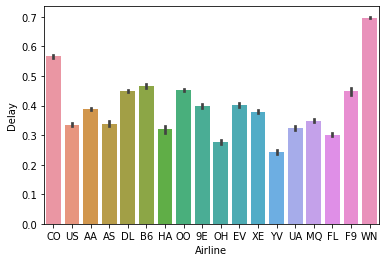

In [11]:
ax = sns.barplot(x=data['Airline'], y=data['Delay'])

In [12]:
# calculate p value for independence between delay and Airline

get_cat_cat_ind(data['Airline'], data['Delay'])

0.0

In [13]:
# calculate p value for independence between delay and AirportFrom

get_cat_cat_ind(data['AirportFrom'], data['Delay'])

0.0

In [14]:
# calculate p value for independence between delay and AirportTo

get_cat_cat_ind(data['AirportTo'], data['Delay'])

0.0

In [15]:
data['DayOfWeek'] = data['DayOfWeek'].astype(str)

In [16]:
# calculate p value for independence between delay and DayOfWeek

get_cat_cat_ind(data['DayOfWeek'], data['Delay'])

2.6007280556741412e-251

In [17]:
# calculate p value for independence between delay and time

get_cat_num_ind(data, "Delay", "Time")

0.0

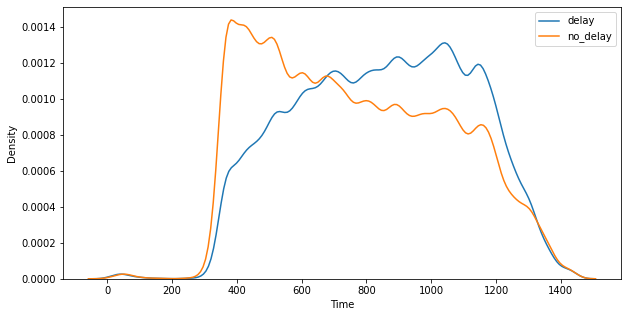

In [18]:
# Visualize distributions for delay with respect to time

delay = data[data["Delay"]==1]["Time"]
no_delay = data[data["Delay"]==0]["Time"]

figure = plt.figure(figsize=(10,5))
sns.kdeplot(delay)
sns.kdeplot(no_delay)
plt.legend(labels=["delay","no_delay"])

In [19]:
# calculate p value for independence between delay and length

get_cat_num_ind(data, "Delay", "Length")

1.8031309141719144e-194

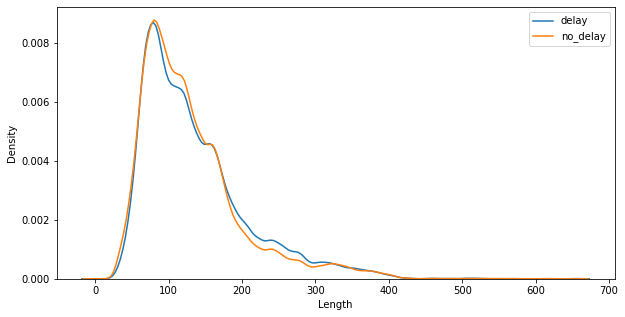

In [20]:
# visualize distributions for delay with respect to length

delay = data[data["Delay"]==1]["Length"]
no_delay = data[data["Delay"]==0]["Length"]

figure = plt.figure(figsize=(10,5))
sns.kdeplot(delay)
sns.kdeplot(no_delay)
plt.legend(labels=["delay","no_delay"])

**Preprocessing Data**

In [21]:
data['Length'] = data['Length'].apply(lambda x: x+1)

<AxesSubplot:xlabel='Length', ylabel='Density'>

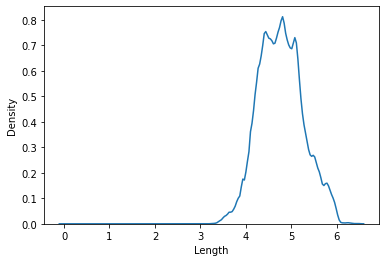

In [22]:
sns.kdeplot(np.log(data['Length']))

In [23]:
data['Length'] = np.log(data['Length'])

In [24]:
data['Delay'] = data['Delay'].astype(str)

In [25]:
features = [x for x in data.columns if x != "Delay"]

In [26]:
X=data[features]
y = data['Delay']

In [27]:
X = pd.get_dummies(X)

In [28]:
dummy_features = X.columns

In [29]:
X = X.values

**Modeling**

As a classification problem, we should consider models like Logistic Regression, Decision Trees, Random Forest, and XGBoost.

Because the dataset is very large, using a classifier like RandomForest may prove to be slow.

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [32]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [34]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)
predictions = rfc.predict(X_test_scaled)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66     89905
           1       0.57      0.55      0.56     71910

    accuracy                           0.62    161815
   macro avg       0.61      0.61      0.61    161815
weighted avg       0.61      0.62      0.62    161815



In [37]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
predictions = lr.predict(X_test_scaled)

In [38]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.65      0.77      0.71     89905
           1       0.63      0.49      0.55     71910

    accuracy                           0.65    161815
   macro avg       0.64      0.63      0.63    161815
weighted avg       0.64      0.65      0.64    161815



In [39]:
confusion_matrix(y_test, predictions)

array([[69462, 20443],
       [36699, 35211]])